In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings                     
warnings.filterwarnings("ignore")

Reading raw data 

In [2]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')
print('train data set:',train.shape)
print('test data set:',test.shape)

train data set: (31647, 18)
test data set: (13564, 17)


Variale identification

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
ID            31647 non-null int64
age           31647 non-null int64
job           31647 non-null object
marital       31647 non-null object
education     31647 non-null object
default       31647 non-null object
balance       31647 non-null int64
housing       31647 non-null object
loan          31647 non-null object
contact       31647 non-null object
day           31647 non-null int64
month         31647 non-null object
duration      31647 non-null int64
campaign      31647 non-null int64
pdays         31647 non-null int64
previous      31647 non-null int64
poutcome      31647 non-null object
subscribed    31647 non-null object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [4]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

All the columns have 31647 values in it, no missing values. It is evident that the columns ID, age, balance, day, duration, campaign, pdays, previous are numeric data attributes. The columns job, maritial, education, default, housing, loan, contact, month, poutcome, subscribed are categorical attribute. Subscribed is the target variable. 

Univariate Analysis 

(array([ 923., 8271., 8994., 5577., 5001., 2307.,  268.,  216.,   81.,
           9.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

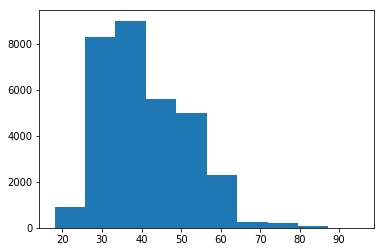

In [5]:
plt.hist(train['age'])

In [6]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

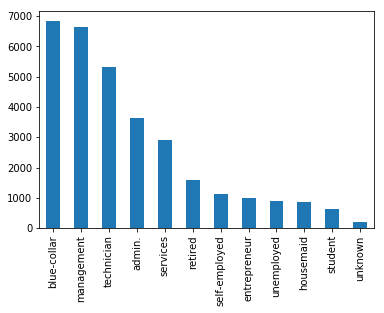

In [7]:
train['job'].value_counts().plot.bar()

In [8]:
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

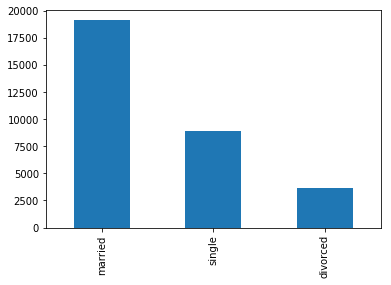

In [9]:
train['marital'].value_counts().plot.bar()

In [10]:
train['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

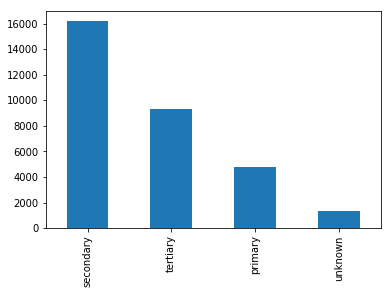

In [11]:
train['education'].value_counts().plot.bar()

In [12]:
train['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

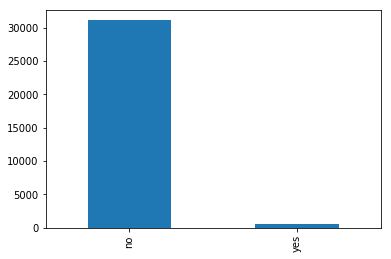

In [13]:
train['default'].value_counts().plot.bar()

In [14]:
train['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

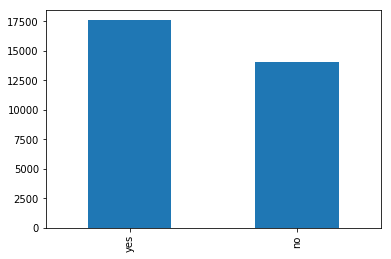

In [15]:
train['housing'].value_counts().plot.bar()

In [16]:
train['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

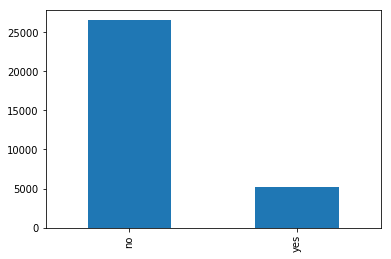

In [17]:
train['loan'].value_counts().plot.bar()

In [18]:
train['contact'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

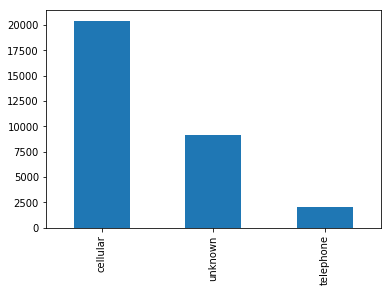

In [19]:
train['contact'].value_counts().plot.bar()

In [20]:
train['month'].value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

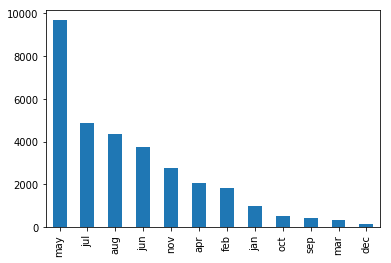

In [21]:
train['month'].value_counts().plot.bar()

In [22]:
train['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

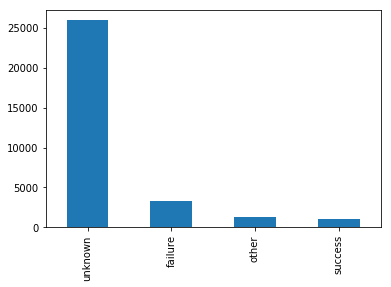

In [23]:
train['poutcome'].value_counts().plot.bar()

Univariate Analysis: Target Variable 

In [24]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

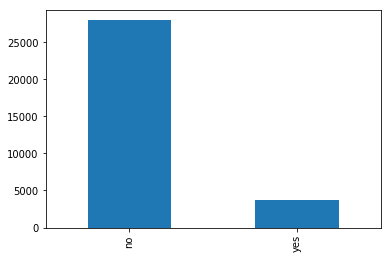

In [25]:
train['subscribed'].value_counts().plot.bar()

In [26]:
print('The percentage of people who have subscribed:',(3715/(27932+3715))*100)

The percentage of people who have subscribed: 11.73886940310298


Bivariate Analysis

In [27]:
train['subscribed'].replace('no',0,inplace=True)
train['subscribed'].replace('yes',1,inplace=True)

In [28]:
train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


There is positive correlation between the duration and the target variable

In [29]:
train.groupby('subscribed')['age'].mean()

subscribed
0    40.862165
1    41.672140
Name: age, dtype: float64

In [30]:
train['subscribed'][train['age']<21].value_counts()

0    43
1    26
Name: subscribed, dtype: int64

In [31]:
print('The percentage of people who have subscribed below the age of 21:',(26/(42+26))*100)

The percentage of people who have subscribed below the age of 21: 38.23529411764706


In [32]:
train['subscribed'][train['age']>60].value_counts()

0    481
1    344
Name: subscribed, dtype: int64

In [33]:
print('The percentage of people who have subscribed above the age of 60:',(344/(344+481))*100)

The percentage of people who have subscribed above the age of 60: 41.6969696969697


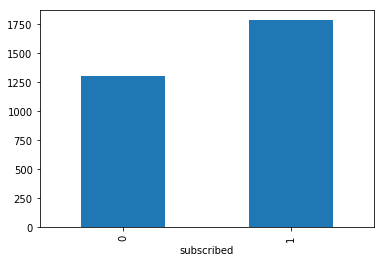

In [34]:
train.groupby('subscribed')['balance'].mean().plot.bar()

In [35]:
train['subscribed'][train['balance']>1500].value_counts()

0    6400
1    1250
Name: subscribed, dtype: int64

In [36]:
print('The percentage of people who have balance above the 1300:',(1359/(1359+7217))*100)

The percentage of people who have balance above the 1300: 15.846548507462687


In [37]:
print('The percentage of people who have balance above the 1400:',(1293/(1293+6771))*100)

The percentage of people who have balance above the 1400: 16.034226190476193


In [38]:
train.groupby('subscribed')['day'].mean()

subscribed
0    15.925462
1    15.158816
Name: day, dtype: float64

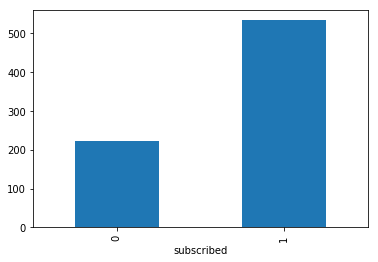

In [39]:
train.groupby('subscribed')['duration'].mean().plot.bar()

In [40]:
train['subscribed'][train['duration']>300].value_counts()

0    6197
1    2396
Name: subscribed, dtype: int64

In [41]:
print('The percentage of people who have subscribed when the duration is more than 300:',(2396/(2396+6197))*100)

The percentage of people who have subscribed when the duration is more than 300: 27.883160712207612


In [42]:
train.groupby('subscribed')['campaign'].mean()

subscribed
0    2.845876
1    2.162853
Name: campaign, dtype: float64

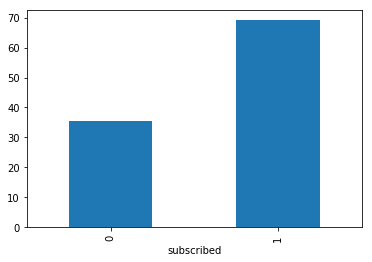

In [43]:
train.groupby('subscribed')['pdays'].mean().plot.bar()

In [44]:
train['subscribed'][train['pdays']>40].value_counts()

0    4249
1    1314
Name: subscribed, dtype: int64

In [45]:
print('The percentage of people who have subscribed when pdays is more than 40:',(1314/(1314+4249))*100)

The percentage of people who have subscribed when pdays is more than 40: 23.620348732698186


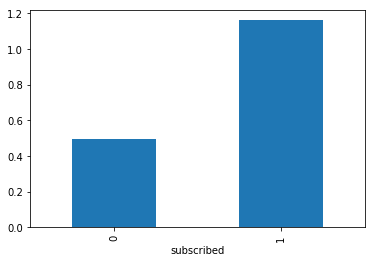

In [46]:
train.groupby('subscribed')['previous'].mean().plot.bar()

In [47]:
train['subscribed'][train['previous']>0.6].value_counts()

0    4379
1    1344
Name: subscribed, dtype: int64

In [48]:
print('The percentage of people who have subscribed when the previous is more than 0.6:',(1344/(1344+4379))*100)

The percentage of people who have subscribed when the previous is more than 0.6: 23.4841866154115


In [49]:
job = pd.crosstab(train['job'],train['subscribed'])
job['percent_1'] = (job[1]/(job[0]+job[1]))*100
job

subscribed,0,1,percent_1
job,,,
admin.,3179,452,12.448361
blue-collar,6353,489,7.147033
entrepreneur,923,85,8.432540
housemaid,795,79,9.038902
management,5716,923,13.902696
retired,1212,362,22.998729
self-employed,983,140,12.466607
services,2649,254,8.749569
student,453,182,28.661417


Based on the data, students and retired clients are more likely to take the term deposit(28% and 23%)

In [50]:
marital_data = pd.crosstab(train['marital'],train['subscribed'])
marital_data['percent_1'] = (marital_data[1]/(marital_data[0]+marital_data[1]))*100
marital_data

subscribed,0,1,percent_1
marital,,,
divorced,3185,445,12.258953
married,17176,1919,10.049751
single,7571,1351,15.142345


In [51]:
edu_Data = pd.crosstab(train['education'],train['subscribed'])
edu_Data['percent_1'] = (edu_Data[1]/(edu_Data[0]+edu_Data[1]))*100
edu_Data

subscribed,0,1,percent_1
education,,,
primary,4381,427,8.881032
secondary,14527,1697,10.459813
tertiary,7886,1415,15.213418
unknown,1138,176,13.394216


In [52]:
default_data = pd.crosstab(train['default'],train['subscribed'])
default_data['percent_1'] = (default_data[1]/(default_data[0]+default_data[1]))*100
default_data

subscribed,0,1,percent_1
default,,,
no,27388,3674,11.827957
yes,544,41,7.008547


In [53]:
housing = pd.crosstab(train['housing'],train['subscribed'])
housing['percentage_1'] = (housing[1]/(housing[1]+housing[0]))*100
housing

subscribed,0,1,percentage_1
housing,,,
no,11698,2365,16.817180
yes,16234,1350,7.677434


In [54]:
loan_data = pd.crosstab(train['loan'],train['subscribed'])
loan_data['percentage_1'] = (loan_data[1]/(loan_data[1]+loan_data[0]))*100
loan_data

subscribed,0,1,percentage_1
loan,,,
no,23132,3384,12.762106
yes,4800,331,6.450984


In [55]:
contact_data = pd.crosstab(train['contact'],train['subscribed'])
contact_data['percentage_1'] = (contact_data[1]/(contact_data[1]+contact_data[0]))*100
contact_data

subscribed,0,1,percentage_1
contact,,,
cellular,17352,3071,15.036968
telephone,1779,268,13.092330
unknown,8801,376,4.097200


In [56]:
month_data = pd.crosstab(train['month'],train['subscribed'])
month_data['percentage_1'] = (month_data[1]/(month_data[1]+month_data[0]))*100
month_data

subscribed,0,1,percentage_1
month,,,
apr,1671,384,18.686131
aug,3813,520,12.000923
dec,85,72,45.859873
feb,1522,305,16.694034
jan,880,97,9.928352
jul,4403,441,9.104046
jun,3355,383,10.246121
mar,168,174,50.877193
may,9020,649,6.712173


In [57]:
poutcome_data = pd.crosstab(train['poutcome'],train['subscribed'])
poutcome_data['percentage_1'] = (poutcome_data[1]/(poutcome_data[1]+poutcome_data[0]))*100
poutcome_data

subscribed,0,1,percentage_1
poutcome,,,
failure,2931,431,12.819750
other,1071,217,16.847826
success,374,694,64.981273
unknown,23556,2373,9.151915


Model Building 

In [58]:
def get_train_data():
    train_data = pd.read_csv('../Data/train.csv')
    return train_data

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [60]:
def preprocessing_data(train_data):
    bins = [0,21,60,100]
    groups = ['underage','adults','senior citizens']
    train_data['age_binned'] = pd.cut(train_data['age'],bins,labels=groups)
    train_data['age_binned'].replace('adults',0,inplace=True)
    train_data['age_binned'].replace('underage',1,inplace=True)
    train_data['age_binned'].replace('senior citizens',2,inplace=True)
    train_data.drop('age',axis=1,inplace=True)
    
    train_data['default'].replace('no',0,inplace=True)
    train_data['default'].replace('yes',1,inplace=True)
    
    train_data['housing'].replace('no',1,inplace=True)
    train_data['housing'].replace('yes',0,inplace=True)
    
    train_data['loan'].replace('no',1,inplace=True)
    train_data['loan'].replace('yes',0,inplace=True)
    
    train_data['contact'].replace('cellular',2,inplace=True)
    train_data['contact'].replace('telephone',1,inplace=True)
    train_data['contact'].replace('unknown',0,inplace=True)
    
    train_data['month'].replace('dec',1,inplace=True)
    train_data['month'].replace('mar',1,inplace=True)
    train_data['month'].replace('oct',1,inplace=True)
    train_data['month'].replace('sep',1,inplace=True)
    train_data['month'].replace('apr',0,inplace=True)
    train_data['month'].replace('aug',0,inplace=True)
    train_data['month'].replace('feb',0,inplace=True)
    train_data['month'].replace('jan',0,inplace=True) 
    train_data['month'].replace('jul',0,inplace=True)
    train_data['month'].replace('jun',0,inplace=True)
    train_data['month'].replace('may',0,inplace=True)
    train_data['month'].replace('nov',0,inplace=True)
    
    train_data['poutcome'].replace('success',1,inplace=True)
    train_data['poutcome'].replace('unknown',0,inplace=True)
    train_data['poutcome'].replace('failure',0,inplace=True)
    train_data['poutcome'].replace('other',0,inplace=True)
    train_data = pd.get_dummies(train_data)
    return train_data

In [61]:
def model_evaluation(preprocessing_fuction):
    train_data = get_train_data()
    target_data = train_data['subscribed']
    train_data.drop('subscribed',axis=1,inplace=True)
    train_data = preprocessing_fuction(train_data)
    print(train_data.columns)
    print('number of columns:',len(train_data.columns))
    x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2, random_state=12)
    L = LogisticRegression()
    L.fit(x_train,y_train)
    prediction = L.predict(x_test)
    DC = DecisionTreeClassifier(max_depth=4,random_state=0)
    DC.fit(x_train,y_train)
    predict =DC.predict(x_test)
    print('L:',accuracy_score(y_test,prediction))
    print('DC:',accuracy_score(y_test,predict))

In [62]:
model_evaluation(preprocessing_data)

Index(['ID', 'default', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'age_binned', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown'],
      dtype='object')
number of columns: 33
L: 0.9020537124802528
DC: 0.9058451816745655


In [63]:
DC = DecisionTreeClassifier(max_depth=4,random_state=12)

In [64]:
train = get_train_data()
target = train['subscribed']
train.drop('subscribed',axis=1,inplace=True)
train = preprocessing_data(train)
DC.fit(train,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')

In [65]:
test = preprocessing_data(test)

In [66]:
prediction = DC.predict(test)

In [67]:
submission = pd.DataFrame()
submission['ID'] = test['ID']
submission['prediction']=prediction

In [68]:
submission.to_csv('../Data/My_submission.csv')